In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler,minmax_scale





In [63]:
df = pd.read_csv('cleaned_data.csv')
df.head(1)

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,low_credit_score,is_Elderly,vip_customer,country_France,country_Germany,country_Spain,IsActiveWithbalance,IsActiveWithoutbalance,InactiveWithoutbalance
0,619,0,42,2,0.0,1,1,1,101348.88,1,0,0,0,1,0,0,0,1,0


In [64]:
#Feature selection
X = df.drop('churn', axis=1)
y = df["churn"]

In [65]:
#splitting data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [66]:
#training on decision tree   73%
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier(
    random_state = 42,
    max_depth=4
    )

dec_tree.fit(X_train,y_train)
dec_tree_y_pred = dec_tree.predict(X_test)

print(classification_report(y_test,dec_tree_y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1593
           1       0.74      0.42      0.54       407

    accuracy                           0.85      2000
   macro avg       0.80      0.69      0.72      2000
weighted avg       0.84      0.85      0.84      2000



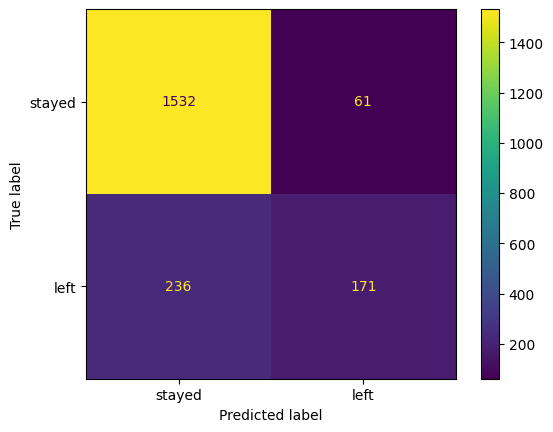

In [67]:
#confusion matrix decision tree
actual = y_test
predited = dec_tree_y_pred
confusion_mtx = metrics.confusion_matrix(actual, predited)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_mtx,display_labels=['stayed','left'])
cm_display.plot()

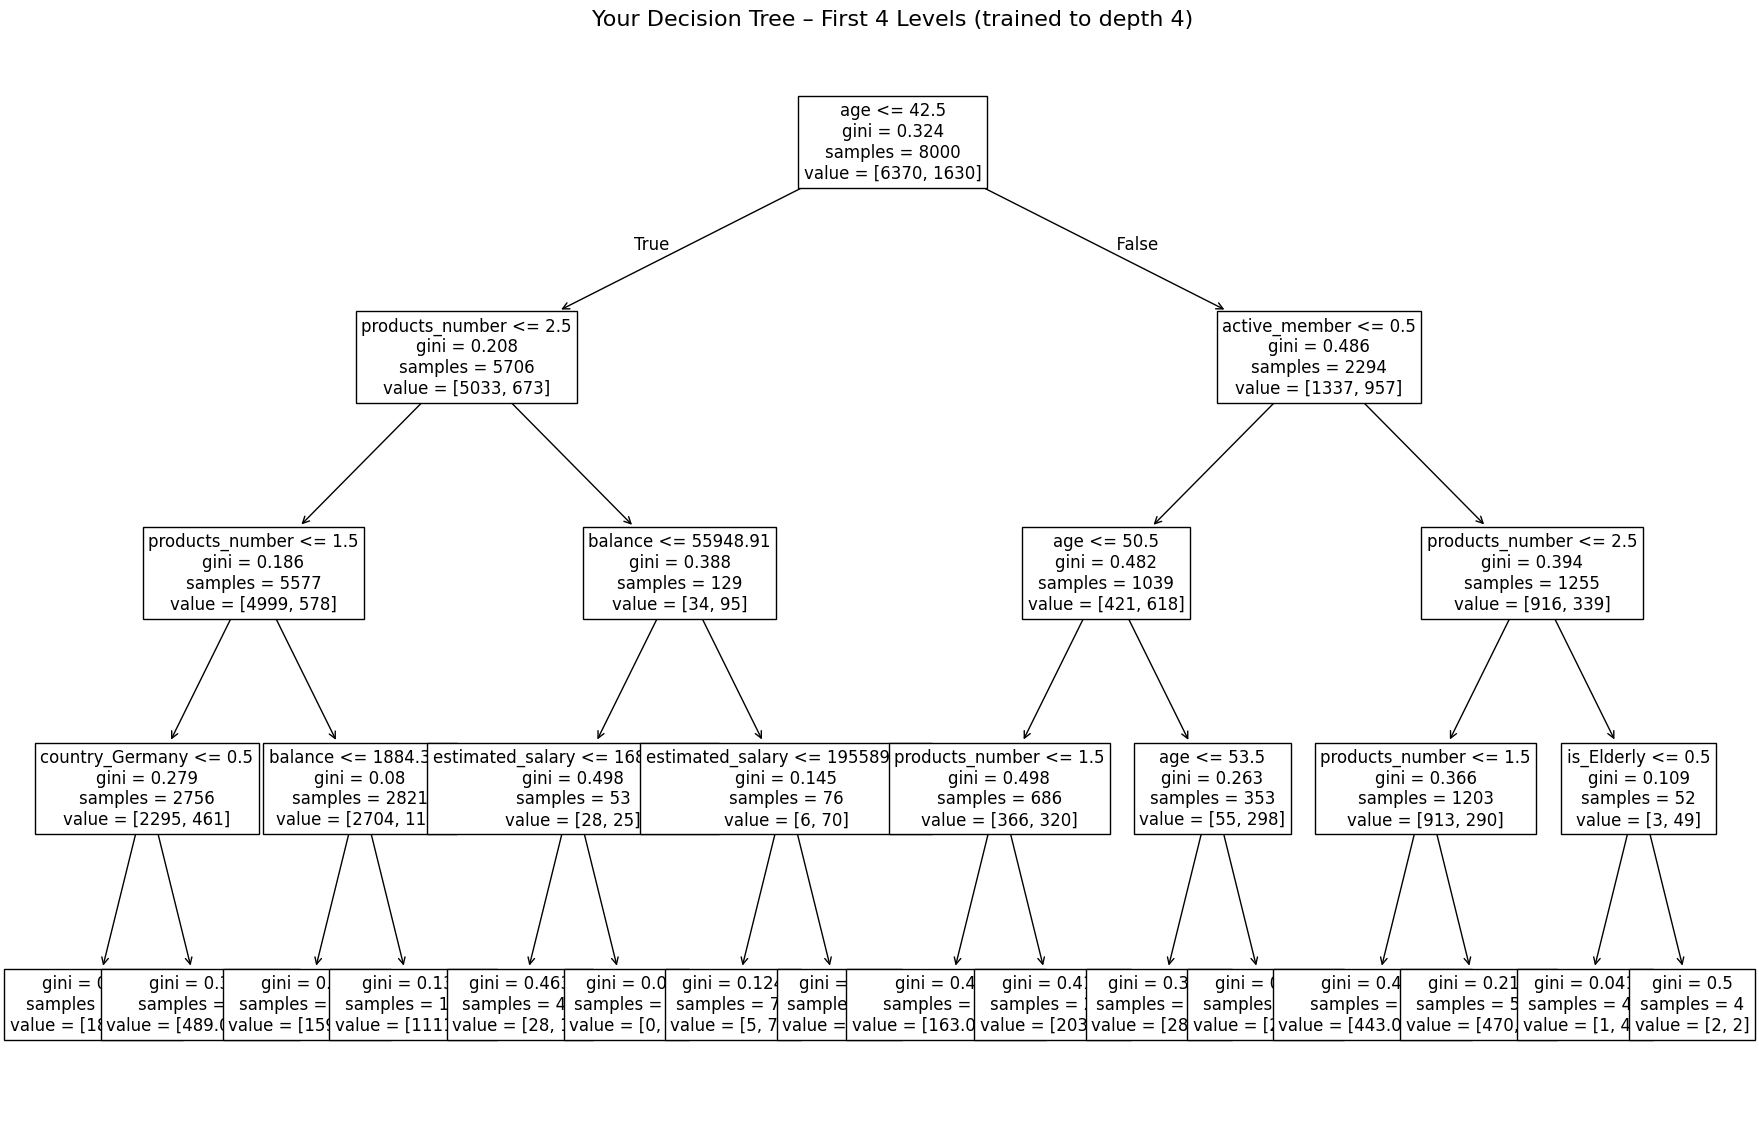

In [68]:
from sklearn.tree import plot_tree


plt.figure(figsize=(22, 14))
plot_tree(
    dec_tree,
    fontsize=12,
    feature_names=X.columns,
    max_depth=4   # ← show only top 4 levels so it fits nicely
)
plt.title("Your Decision Tree – First 4 Levels (trained to depth 4)", fontsize=16)
plt.show()

In [69]:
##Naive Bayes classifier  (assume independency)
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()
naive_bayes.fit(X_train,y_train)

naive_b_y_pred = naive_bayes.predict(X_test)

print(classification_report(y_test,naive_b_y_pred))


              precision    recall  f1-score   support

           0       0.81      0.96      0.88      1593
           1       0.48      0.13      0.21       407

    accuracy                           0.79      2000
   macro avg       0.65      0.55      0.54      2000
weighted avg       0.75      0.79      0.74      2000



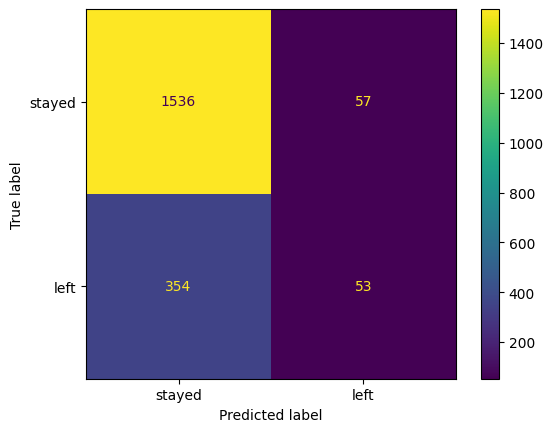

In [70]:
actual = y_test
predited = naive_b_y_pred
confusion_mtx = metrics.confusion_matrix(actual, predited)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_mtx,display_labels=['stayed','left'])
cm_display.plot()

In [71]:
from sklearn.linear_model import LogisticRegression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

logistic_reg = LogisticRegression(max_iter=1000,random_state=42,class_weight='balanced')


logistic_reg.fit(X_train_scaled,y_train)
log_reg_y_pred = logistic_reg.predict(X_test_scaled)
print(classification_report(y_test,log_reg_y_pred))

              precision    recall  f1-score   support

           0       0.91      0.74      0.82      1593
           1       0.41      0.71      0.52       407

    accuracy                           0.73      2000
   macro avg       0.66      0.73      0.67      2000
weighted avg       0.81      0.73      0.76      2000



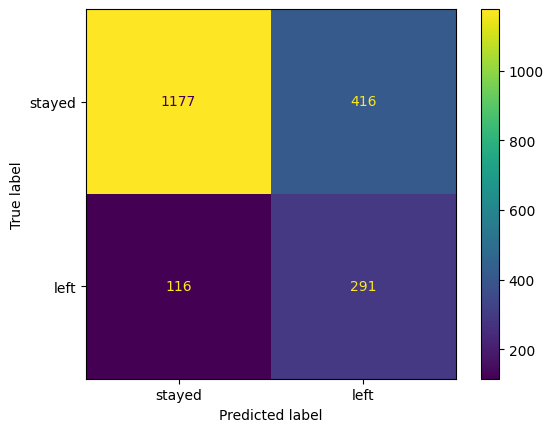

In [72]:
actual = y_test
predited = log_reg_y_pred
confusion_mtx = metrics.confusion_matrix(actual, predited)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_mtx,display_labels=['stayed','left'])
cm_display.plot()

In [73]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train,y_train)
knn_y_pred = knn.predict(X_test)

print(classification_report(y_test,knn_y_pred))

              precision    recall  f1-score   support

           0       0.80      0.94      0.86      1593
           1       0.26      0.08      0.13       407

    accuracy                           0.76      2000
   macro avg       0.53      0.51      0.49      2000
weighted avg       0.69      0.76      0.71      2000



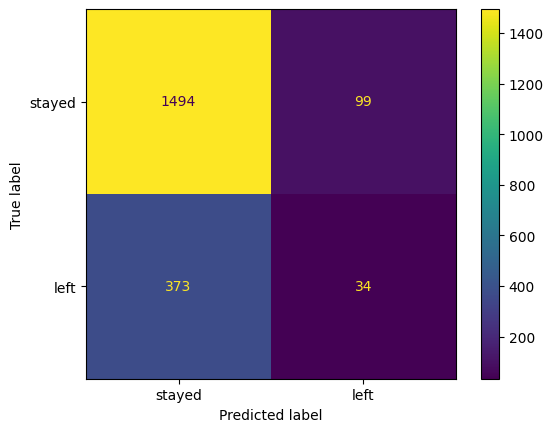

In [74]:
#confusion matrix KNN
actual = y_test
predited = knn_y_pred
confusion_mtx = metrics.confusion_matrix(actual, predited)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_mtx,display_labels=['stayed','left'])
cm_display.plot()

In [78]:
#Cnn
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, GlobalMaxPooling1D, Flatten
X_train_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    Conv1D(32, kernel_size=3, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])
model.fit(X_train_cnn, y_train, epochs=50, batch_size=32, verbose=0, validation_split=0.2)

cnn_y_pred = (model.predict(X_test_cnn) > 0.5).astype(int).flatten()
print(classification_report(y_test, cnn_y_pred))

C:\Users\Surface Laptop 3\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1593
           1       0.69      0.43      0.53       407

    accuracy                           0.84      2000
   macro avg       0.78      0.69      0.72      2000
weighted avg       0.83      0.84      0.83      2000



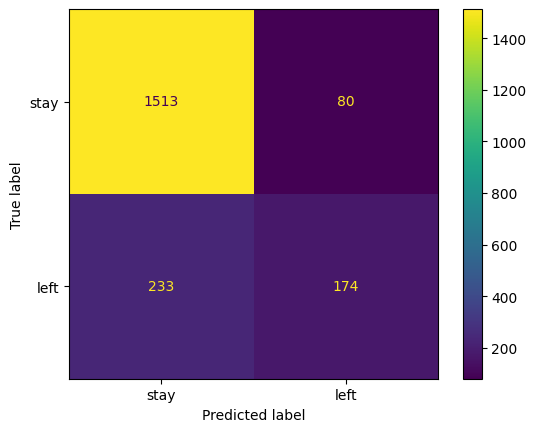

In [79]:
actual = y_test
predict = cnn_y_pred
confusion_mtx = metrics.confusion_matrix(actual,predict)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_mtx,display_labels=['stay','left'])
cm_display.plot()
plt.show()

In [ ]:
#Random forest classifier
